# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

# Your Work

## Data Exploration

### Multivariate analysis

Start by looking at missing values to determine what actions need to be taken around this, if any.

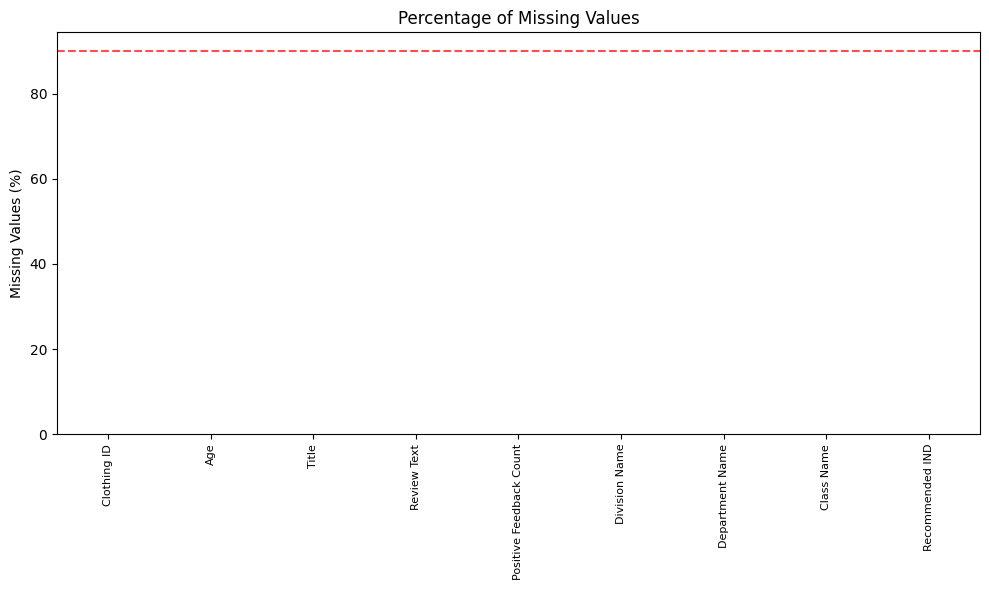

In [4]:
from matplotlib import pyplot as plt
null_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
threshold = 90

# Bar Chart Visualization with conditional colors
plt.figure(figsize=(10, 6))
ax = null_percentage.plot(kind='bar', color='#5A287D')
plt.title('Percentage of Missing Values')
plt.ylabel('Missing Values (%)')
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.7)  # Add a reference line
plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()

There are no null values across any of our features, including the target feature, which confirms there are no further actions that are required in the preprocessing step to address this. 

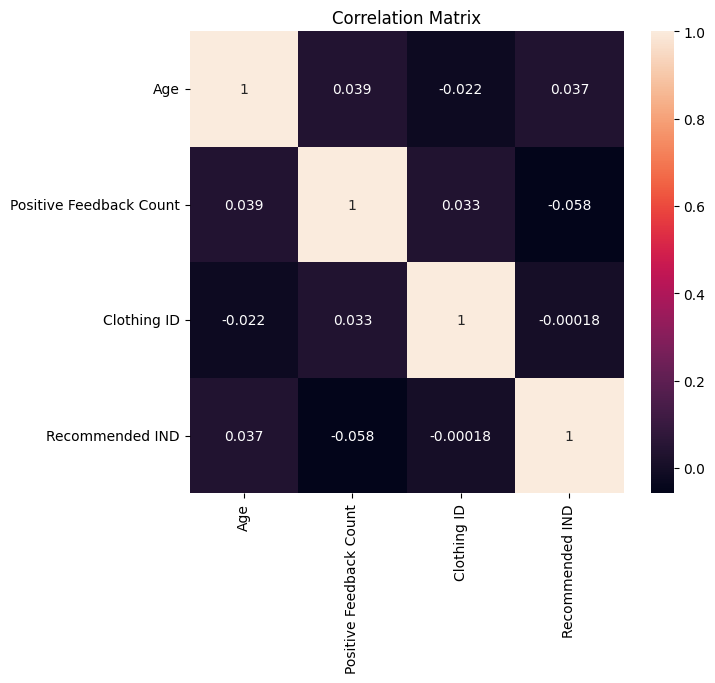

In [5]:
import seaborn as sns
data_num= df[['Age', 'Positive Feedback Count', 'Clothing ID', 'Recommended IND']]
corr_matrix = data_num.corr()

# plot the correlation matrix
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


Creating a correlation matrix with the 4 numeric features (including binary target feature) has shown us that there is very small correlation between them so we cannot derive any meaningful relationship between them at this point.

### Univariate analysis

#### Target Feature

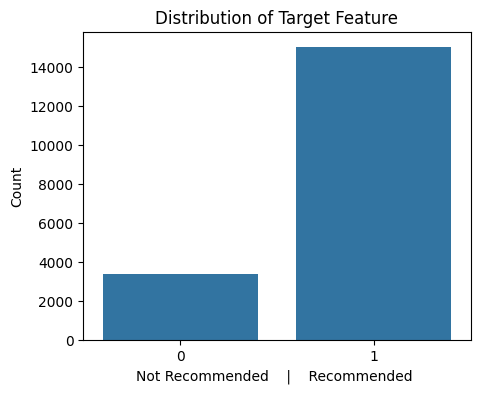

In [6]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.xlabel("Not Recommended    |    Recommended ")
plt.ylabel("Count")
plt.title("Distribution of Target Feature")
plt.show()

From this bar chart it is observed that the majority of reviews reccomend the product, and that there is a significant class imabalnce. This is something that will have to be considered when training the models, as this may cause bias towards the majority class. 

#### Categorical Features

Start by looking at categorical features to understand the possible values and distribution across categories. 

In [7]:
division = X_train['Division Name'].value_counts()
print(division)

Division Name
General           10524
General Petite     6073
Name: count, dtype: int64


In [8]:
department = X_train['Department Name'].value_counts()
print(department)

Department Name
Tops        7842
Dresses     4838
Bottoms     2880
Jackets      782
Intimate     160
Trend         95
Name: count, dtype: int64


In [9]:
class_name= X_train['Class Name'].value_counts()
print(class_name)

Class Name
Dresses           4838
Knits             3580
Blouses           2346
Sweaters          1089
Pants             1057
Jeans              866
Fine gauge         827
Skirts             725
Jackets            528
Outerwear          254
Shorts             231
Lounge             160
Trend               95
Casual bottoms       1
Name: count, dtype: int64


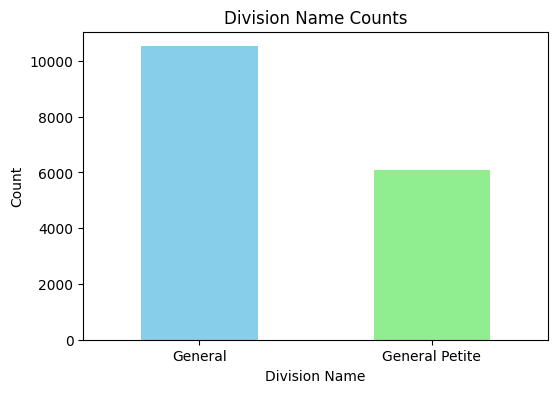

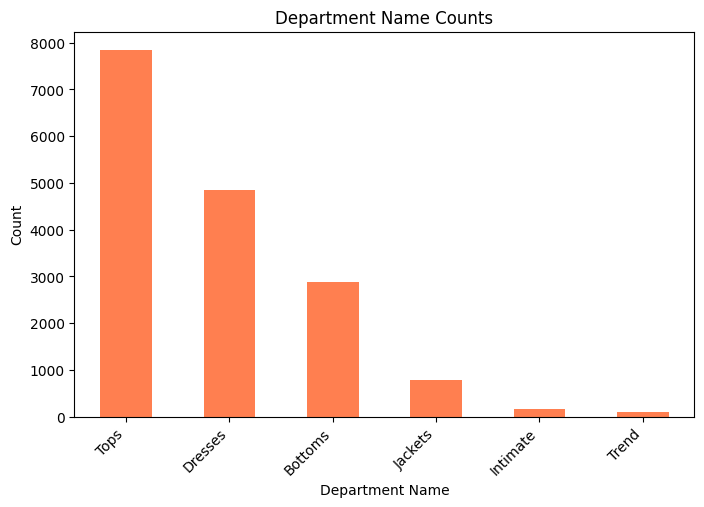

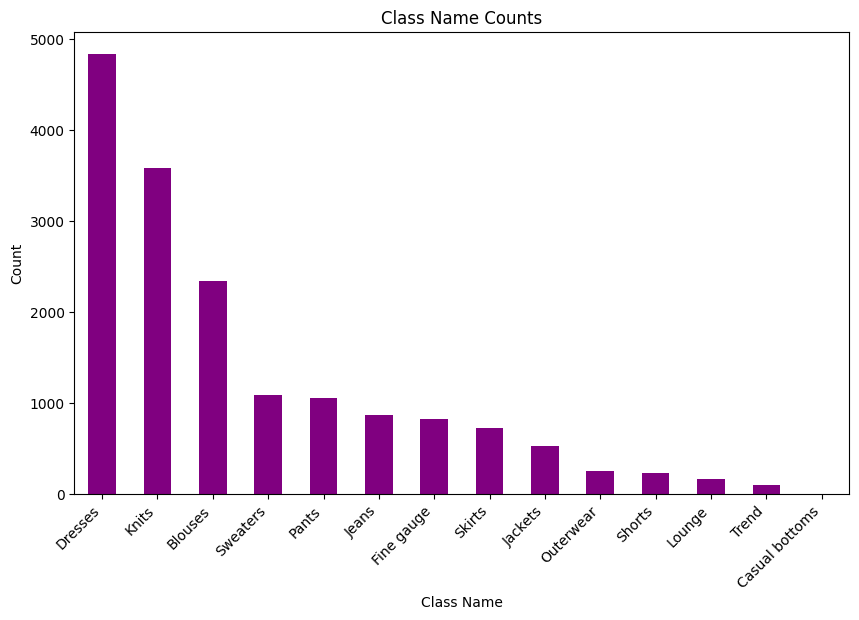

In [10]:
import matplotlib.pyplot as plt
# Plot for Division Name
plt.figure(figsize=(6,4))
division.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Division Name Counts')
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot for Department Name
plt.figure(figsize=(8,5))
department.plot(kind='bar', color='coral')
plt.title('Department Name Counts')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot for Class Name
plt.figure(figsize=(10,6))
class_name.plot(kind='bar', color='purple')
plt.title('Class Name Counts')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that division is split between general and general petite somewhat evenly. Tops is the most prevalent department type, with stead incremental decreases to dresses, bottoms and jackets. Intimate and trend departments are fairly uncommon. The most prevalent class is dresses. This helps us understand what we are dealing with as we build the pre processing part of the pipeline. 

#### Numerical Features

In [11]:
X['Age'].describe()

count    18442.000000
mean        43.383635
std         12.246264
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

We can see that the reviwers age ranges from 18-99, with a mean of 43.

In [12]:
X['Positive Feedback Count'].describe()

count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

For positive feedback count, the values range from 0-122 votes marking a review as positive. The mean however, it particularly low at 2.7, showing that most reviews get very few positive votes, backed up by the 3rd quartile being only 3. This feature will likely have some outliers, which is important to consider. 

As Clothing ID is an identification integer for each clothing item, there is no meaningful information that can be derived from univariate analysis. In fact, there is a general lack of predictve power in this feature. Although there may be potential groupings where the same product is likely to get more positive/ negative reviews, this information could also be captured by the other more broad categorical features, for example 'trend' items getting similr review patterns. The high cardinality risks overfitting, as well as adding additional noise to the model, meaning it is more logical to drop this feature before getting to the modelling stage. 

#### Text features

In [13]:
title_length= X["Title"].apply(len)
print((title_length).describe())

count    18442.000000
mean        19.067672
std          9.569247
min          2.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         52.000000
Name: Title, dtype: float64


The mean title of the review is 19 words, and the range is from 2- 52. This is important to note as we may need to consider the different length of the texts when applying prosses such as tokenisation and NLP. 

In [14]:
review_length= X["Review Text"].apply(len)
print((review_length).describe())

count    18442.000000
mean       319.989535
std        141.953692
min          9.000000
25%        201.000000
50%        317.500000
75%        478.000000
max        508.000000
Name: Review Text, dtype: float64


The average review length is 319 words, with a range from 9- 508 words. Same as above, it is important to be aware of this before applying any other techniques to derive insights from the text. 

## Building Pipeline

Before building out any pipelines, we need to define the seperate data types we have been dealing with in the EDA stage. 

These will be as follows: 

**Numerical**
* `Age`
* `Positive Feedback Count`  

**Categorical**
* `Division`
* `Department` 
* `Class name` 

**Text** 
* `Review text` 

In [15]:

#define numeric features and print 

# Define numerical, categorical, and text features

num_features =['Age', 'Positive Feedback Count']

print('Numerical features:', num_features)

#define categorical features and print

cat_features =['Division Name', 'Department Name', 'Class Name']
    
print('Categorical features:', cat_features)

#define text features and print

text_features =['Review Text']

print ('Text features:', text_features)


Numerical features: ['Age', 'Positive Feedback Count']
Categorical features: ['Division Name', 'Department Name', 'Class Name']
Text features: ['Review Text']


### Numerical Features Pipelines

Min max scaler is used to scale the features to a range between 0 and 1. This will then transform the values to be based on the minimum and maximum values of the feature, ensring to preserve the relationship between the data points. 

In [16]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ 
    (
    'num', 
    MinMaxScaler())
])
num_pipeline

Pipeline(steps=[('num', MinMaxScaler())])

### Categorical Features Pipeline

For our categorical features, we want to be careful to not imply a rank order. The best approach for concerting categorical features to be useful for a machine learning model is to apply One Hot Encoding, where it creates a binary feature for each category in the original feature. 

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
    'cat',
    OneHotEncoder(
    sparse_output= False,
    handle_unknown= 'ignore',
    )
    ),
])
cat_pipeline

Pipeline(steps=[('cat',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Text Pipeline

For the text features, we will require spaCy to preprocess our text. We will first utilise TF-IDF to evaluate how important a word is given its frequency, will help form our text pipeline so our model can learn from the reviews.

In [ ]:
! python -m spacy download en_core_web_sm

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy 

nlp= spacy.load('en_core_web_sm')

text_pipeline = Pipeline([
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
text_pipeline 

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

### Combine feature engineering pipelines

Now we have established the 3 seperate preprocessing pipelines for our 3 data types, it is now time to bring them together into one feature engineering pipeline. 

In [21]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('text', text_pipeline, 'Review Text'),
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num', MinMaxScaler())]),
                                 ['Age', 'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Division Name', 'Department Name',
                                  'Class Name']),
                                ('text',
                                 Pipeline(steps=[('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 'Review Text')])

## Training Pipeline

Now we have a feature engineering pipeline it is now time to build the machine learning model and append it to the pipeline we have just created. For training, we will begin with a base model of random forest classifier. After training, we will use the model to make predictions on the test set and use accuracy score and classification report to understand how this inistial model has performed. This will set us up well for the model evaluation and fine tuning stages to come. 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
#model build- random state 42 to ensure reproducability 
model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=42),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num',
                                                                   MinMaxScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('text',
                                                  Pipeline(steps=[('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  'Review Text')])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model_pipeline.predict(X_test)

In [24]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8444
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.22      0.35       349
           1       0.85      0.99      0.91      1496

    accuracy                           0.84      1845
   macro avg       0.84      0.61      0.63      1845
weighted avg       0.84      0.84      0.81      1845



### Interpreting the results

On this test set, the model received an accuracy score of __84%__. Whilst this is a good initial score for the base model, there is room for improvement. Accuracy score is not the best metric when analysing imbalanced data as it may be biased towards the majority class. Looking at the classification report, we can see that the precision score tells us that __83%__ of class 0 and __85%__ of class 1 were predicted correctly. However, for recall we can see that only __22%__ of actual class 0 were correctly identified compared to the __99%__ of class 1 that were correct identified. An F1 score of __0.35__ for class 0 leaves a lot of room for improvement. This confirms initial aprehensions where the model is not handling the imbalanced target feature particularly well. 

## Fine-Tuning Pipeline

Now we have a base model for comparison, we can now compare how other models will perform. We will keep the pre processing pipeline the same as the other model, and will fit logistic regression, gradient boosting and SVM models to see how they compare. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
}

# Store results
results = {}

# Train and evaluate each pipeline
for model_name, model in models.items():
    pipeline = Pipeline([
        ("feature_engineering", feature_engineering),
        ("classifier", model)
    ])
    
    # Fit pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[model_name] = {'Accuracy': accuracy, 'Classification Report': class_report}

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print('-' * 50)

Some key observations from the fitting of these 3 models are as follows:
* Logistic regression has the highest accuracy score of __0.88__ while the base model Random Forest had the lowest at __0.84__. * The highest precision for our minority class is the SVM model with __0.80__ and __0.87__ for the majority class 
* The highest F1 score across both classes is the Logistic Regresssion model, with __0.63__ and __0.93__ for the minority and majority class respectively 
* The highest recall score for the minority class is also Logistic Regression with __0.52__ (not optimal) and the second highest for the majority class of __0.97__ (compared to SVM with __0.98__).

Overall:
The model that is performing best at this stage is Logistic Regression, with SVM closely behind. It consistently scores the highest across the minority class, which is a particular weak spot for most models. It does leave room for improvement with some hyperparameter tuning. 

### Hyperparameter Tuning

### K- Fold Cross- Validation with GridSearchCV

In [ ]:
#param grid for logistic regression model 
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
}



#initialise models 
lr = LogisticRegression(random_state= 42)


#grid search with cross validation 
cv = 5

In [ ]:
from sklearn.model_selection import GridSearchCV
# for logistic regression 

pipeline_lr = Pipeline([
    ("feature_engineering", feature_engineering),
    ("classifier", LogisticRegression(random_state=42, max_iter=200)) 
])

# Grid search with pipeline
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best model from pipeline
best_lr_pipeline = grid_search_lr.best_estimator_

# Predict and evaluate
y_pred_lr = best_lr_pipeline.predict(X_test)

print("Best Logistic Regression Pipeline Model:")
print(classification_report(y_test, y_pred_lr))

With the CV Grid Search, we can see the best iteration of the logistic regression model. The key observations are as follows:

* The precision for the minority class had dropped to __0.71__ compared to the __0.78__ it was before hyperparameter tuning. 
* However, this is traded off with the other performance metrics for the minority class that have improved. Recall has risen by 0.29 to __0.60__ and F1 score by 0.21 to __0.65__.
* Performance for the majority class has dipped slightly across all 3 metrics, however it is more important to have a balance between the model predicting accurately across both target classes, especially the minority class (0) in this case to avoid model bias as much as possible.